In [1]:
from pysheds.grid import Grid
from pathlib import Path

/home/pdas47/2023_01_24-river-regulation/.env/lib/python3.10/site-packages/pysheds/io.py:142: UserWarning: No `nodata` value detected. Defaulting to 0.
  warnings.warn('No `nodata` value detected. Defaulting to 0.')
/home/pdas47/2023_01_24-river-regulation/.env/lib/python3.10/site-packages/pysheds/io.py:142: UserWarning: No `nodata` value detected. Defaulting to 0.
  warnings.warn('No `nodata` value detected. Defaulting to 0.')


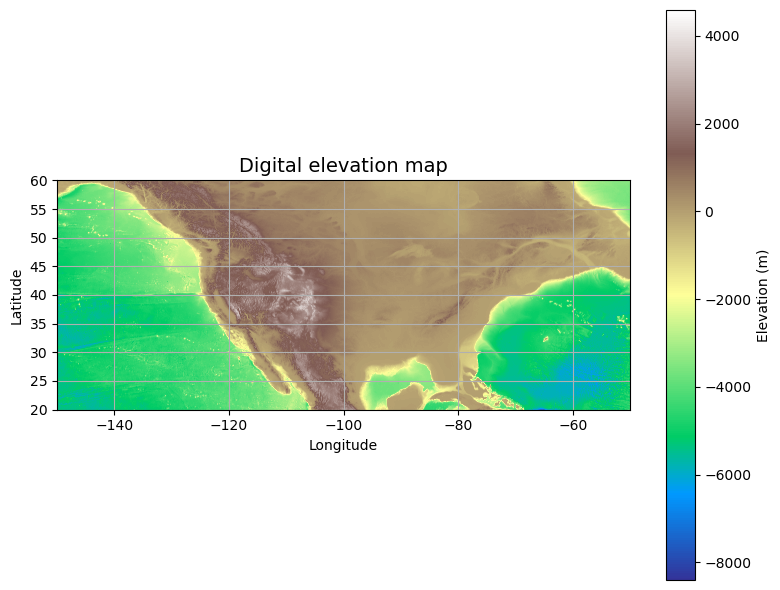

In [10]:
elevation_fn = Path("../../global_data/global_elevation_data/World_e-Atlas-UCSD_SRTM30-plus_v8.tif")

window_bbox = (-150, 20, -50, 60)
grid = Grid.from_raster(str(elevation_fn), window=window_bbox, window_crs=window_crs)

window_crs = grid.crs

dem = grid.read_raster(str(elevation_fn), window=window_bbox, window_crs=window_crs)

# Plot DEM
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=dem.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [11]:
# Resolve flats
inflated_dem = grid.resolve_flats(dem)

# Compute flow directions
fdir = grid.flowdir(inflated_dem)

# From USGS https://waterdata.usgs.gov/nwis/inventory/?site_no=03438500
x, y = -88.3992, 37.1486

catch = grid.catchment(x=x, y=y, fdir=fdir, xytype='coordinate')

# Get the current view and plot
catch_view = grid.view(catch)
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
plt.imshow(catch_view, cmap='Greys_r', zorder=1)
plt.title('Catchment', size=14)
plt.tight_layout()

: 

: 